<div style="text-align: left;"><img src="https://www.juliabox.org/assets/img/juliacloudlogo.png" style="margin: 0px 0px 0px 0px; padding-right: 20px;width: 80px; float: left;" title="" alt="" /></div>
<img src="http://dmkpress.com/images/cms/thumbs/a5b0aeaa3fa7d6e58d75710c18673bd7ec6d5f6d/978-5-97060-370-3_270_369__100.jpg" style="margin: 0px 0px 5px 20px; width: 100px; float: right;" title="" alt="" />
Всестороннее введение в новый язык программирования для научно-технических вычислений [Julia](http://julialang.org/) в книге Малколма Шеррингтона, Packt Publishing, июль 2015.

<h1>Осваиваем язык Julia</h1><br />

Совершенствование мастерства в области аналитики и программирования при помощи Julia в целях решения задач комплексной обработки данных
<div style="text-align: left;font-size:8pt;padding-top:10px;">Программный код Julia (v0.4.5) протестирован в Windows 8.1/10 и Linux/Lubuntu 16.4</div>
<div style="text-align: left;"><h1>Глава 1. Среда разработки Julia</h1></div>


# Начало работы



## Сборка из исходников


In [1]:
println("Я установил среду разработки Julia")

Я установил среду разработки Julia


In [1]:
?print

search: print println print_joined print_escaped print_shortest print_unescaped



```
print(x)
```

Write (to the default output stream) a canonical (un-decorated) text representation of a value if there is one, otherwise call `show`. The representation used by `print` includes minimal formatting and tries to avoid Julia-specific details.


In [1]:
sumsq(x,y) = x^2 + y^2; 

N = 1000000; 

x = 0;
  for i = 1:N
    if sumsq(rand(), rand()) < 1.0 
      x += 1;
    end 
  end

@printf "Расчет числа Pi: для %d испытаний =%8.5f\n" N 4.0*(x / N);

Расчет числа Pi: для 1000000 испытаний = 3.14096



## Интерактивная среда IJulia


In [2]:
using PyPlot

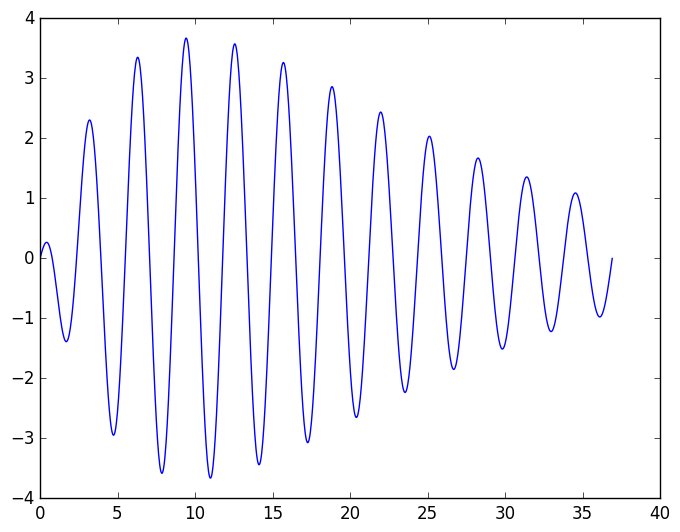

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000001013DB70>

In [3]:
x = linspace(0.0,11.75*pi,1000); y = zeros(1000);

[y[i] = x[i]*cos(2.0*x[i])*exp(-0.1*x[i]) for i=1:1000]

plot(x,y)


# Краткий обзор языка Julia



## Julia через консоль


In [6]:
function run_asian(N = 100000, PutCall = 'C';)
    
# Евроазиатский опцион.
# Использует геометрическое либо арифметическое усреднение.
# Дискретизация по методу Эйлера и Мильштейна для формулы Блэка-Шоулса.
# Характеристики опциона.
    
  println("Установка параметров опциона"); 
    
  S0  = 100;     # Цена "спот" или цена немедленной поставки
  K   = 100;     # Цена "страйк" или цена исполнения
  r   = 0.05;    # Безрисковая ставка
  q   = 0.0;     # Дивидендная доходность  
  v   = 0.2;     # Волатильность
  tma = 0.25;    # Срок до даты платежа

  Averaging = 'A';    # 'A' арифметическое или 'G' геометрическое 
    
  OptType = (PutCall == 'C' ? "CALL" : "PUT");
    
  println("Тип опциона: $OptType");

# Настройки моделирования.
    
  println("Установка параметров моделирования"); 
    
  T  = 100;      # Число временных интервалов  
  dt = tma/T;    # Приращение времени

# Инициализировать матрицы терминальной фондовой цены
# для схем дискретизации по методу Эйлера и Мильштейна. 
    
  S = zeros(Float64,N,T);
    for n=1:N 
      S[n,1] = S0;
    end

# Смоделировать фондовую цену в условиях схем Эйлера и Мильштейна.
# Взять среднее терминальной фондовой цены. 
    
  println("Повторяем $N раз.");
    
  A = zeros(Float64,N); 
    for n=1:N
      for t=2:T
        dW = (randn(1)[1])*sqrt(dt);
        z0 = (r - q - 0.5*v*v)*S[n,t-1]*dt; 
        z1 = v*S[n,t-1]*dW;
        z2 = 0.5*v*v*S[n,t-1]*dW*dW; 
        S[n,t] = S[n,t-1] + z0 + z1 + z2;
      end
    if cmp(Averaging,'A') == 0 
      A[n] = mean(S[n,:]);
    elseif cmp(Averaging,'G') == 0 
      A[n] = exp(mean(log(S[n,:])));
    end 
  end

# Рассчитать премию
    
  P = zeros(Float64,N);
  if cmp(PutCall,'C') == 0 
    for n = 1:N
      P[n] = max(A[n] - K, 0);
    end
  elseif cmp(PutCall,'P') == 0 
    for n = 1:N
      P[n] = max(K - A[n], 0);
    end 
  end

  # Рассчитать цену азиатского опциона 
    
  AsianPrice = exp(-r*tma)*mean(P);
    
  @printf "Цена опциона: %10.4f\n" AsianPrice; 
end

run_asian()

Установка параметров опциона
Тип опциона: CALL
Установка параметров моделирования
Повторяем 100000 раз.
Цена опциона:     2.6019


In [7]:
tic(); run_asian(1000000, 'C'); toc();

Установка параметров опциона
Тип опциона: CALL
Установка параметров моделирования
Повторяем 1000000 раз.
Цена опциона:     2.5831
elapsed time: 7.060831682 seconds



## Установка некоторых пакетов


In [5]:
#
# asian_asciiplot.jl
#

using ASCIIPlots;

S0  = 100;      # Цена "спот"
K   = 102;      # Цена "страйк"
r   = 0.05;     # Безрисковая ставка 
q   = 0.0;      # Дивидендная доходность  
v   = 0.2;      # Волатильность
tma = 0.25;     # Срок до даты платежа 
T   = 100;      # Число временных интервалов  
dt  = tma/T;    # Приращение времени

S = zeros(Float64,T);
S[1] = S0;
dW = randn(T)*sqrt(dt)
[ S[t] = S[t-1] * (1 + (r - q - 0.5*v*v)*dt + v*dW[t] + 0.5*v*v*dW[t]*dW[t]) for t=2:T ]
x = linspace(1,100,T);

scatterplot(x,S,sym='*')


	-------------------------------------------------------------
	|                                                      *     | 108.85
	|                                                            |
	|                                                        **  |
	|                              *                      *** ***|
	|                      *****   *****                         |
	|                       * ** *    * *                 *  *   |
	|                      *    * *  *   *                       |
	|                            *       ** ******     *         |
	|                                      ** **        **       |
	|                    *                 *     *    ***        |
	|                *  ***                       **             |
	|                *                              *            |
	|            ***  **                          * *            |
	|*          * * *                                *           |
	|*         *                    


### Более реалистичные графики с помощью Winston


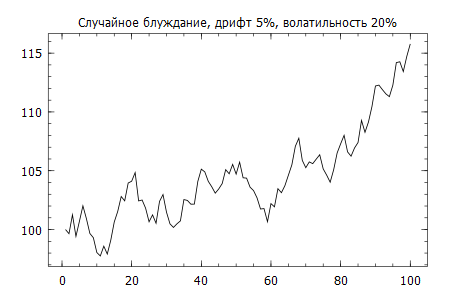

In [4]:
using Winston;

#import Winston;
#wn = Winston;

S0  = 100;      # Цена "спот"
K   = 102;      # Цена "страйк"
r   = 0.05;     # Безрисковая ставка 
q   = 0.0;      # Дивидендная доходность  
v   = 0.2;      # Волатильность
tma = 0.25;     # Срок до даты платежа 
T   = 100;      # Число временных интервалов  
dt  = tma/T;    # Приращение времени

S = zeros(Float64,T)
S[1] = S0;
dW = randn(T)*sqrt(dt);
[ S[t] = S[t-1] * (1 + (r - q - 0.5*v*v)*dt + v*dW[t] + 0.5*v*v*dW[t]*dW[t]) for t=2:T ]
x = linspace(1, T, T);

p = FramedPlot(title="Случайное блуждание, дрифт 5%, волатильность 20%")

add(p, Curve(x,S,Color="red"))

#wn.plot(S)
display(p)